In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

dt = pd.read_csv("../input/creditcardfraud/creditcard.csv")
dt.describe()
dt.isnull().sum()
dt.shape
dt.columns
dt.describe

temp = dt["Class"].value_counts()
df = pd.DataFrame({'Class':temp.index, 'values':temp.values})

trace = go.Bar(
    x = df['Class'],y = df['values'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Blue"),
    text=df['values']
)
data = [trace]
layout = dict(title = 'Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)',xaxis = dict(title = 'Class', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=500
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='class')

df.values
    
# Any results you write to the current directory are saved as output.

array([[     0, 284315],
       [     1,    492]])

In [44]:
df.values

array([[     0, 284315],
       [     1,    492]])

In [45]:
class_0 = dt.loc[dt['Class'] == 0]["Time"]
class_1 = dt.loc[dt['Class'] == 1]["Time"]
hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']
fig = ff.create_distplot(hist_data, group_labels, show_hist= False, show_rug= False)
fig['layout'].update(title = 'Credit Card Transactions Time Density Plot', xaxis=dict(title='Time[s]'))
iplot(fig, filename='dist_only')

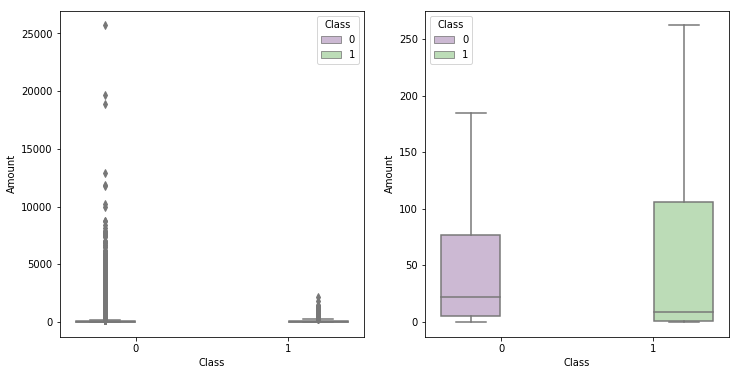

In [50]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=dt, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=dt, palette="PRGn",showfliers=False)
plt.show();